In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('house_rental_data.csv.txt')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [5]:
df = df.drop(['Unnamed: 0'],axis=1)

In [6]:
df = df.drop_duplicates()
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
639,2846.400,5,12,4,2,2,138888
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000


In [7]:
df.shape

(579, 7)

In [8]:
df.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [10]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         579 non-null    float64
 1   Floor        579 non-null    int64  
 2   TotalFloor   579 non-null    int64  
 3   Bedroom      579 non-null    int64  
 4   Living.Room  579 non-null    int64  
 5   Bathroom     579 non-null    int64  
 6   Price        579 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 36.2 KB


In [12]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.00000,579.000000
mean,1516.918580,5.908463,10.778929,2.825561,1.803109,1.80829,61383.614853
std,776.655587,3.893511,5.027210,1.018328,0.477077,0.68816,35764.023105
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.00000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.00000,38000.000000
50%,1419.642000,5.000000,11.000000,3.000000,2.000000,2.00000,50000.000000
75%,1891.077000,8.000000,14.000000,4.000000,2.000000,2.00000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.00000,250000.000000


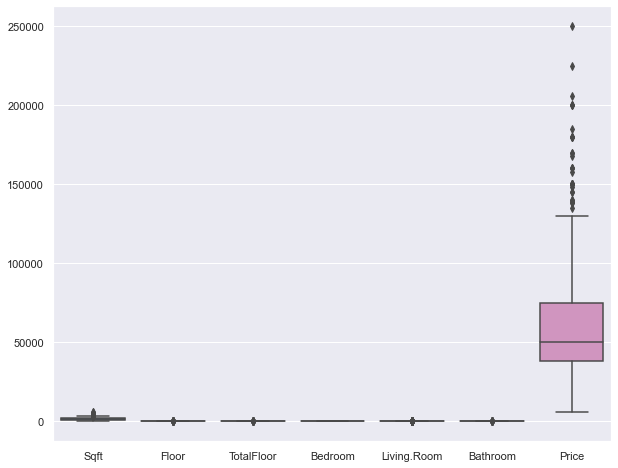

In [13]:
sns.set(rc ={'figure.figsize' :(10,8)})
sns.boxplot(data = df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B508E43B80>,
      dtype=object)

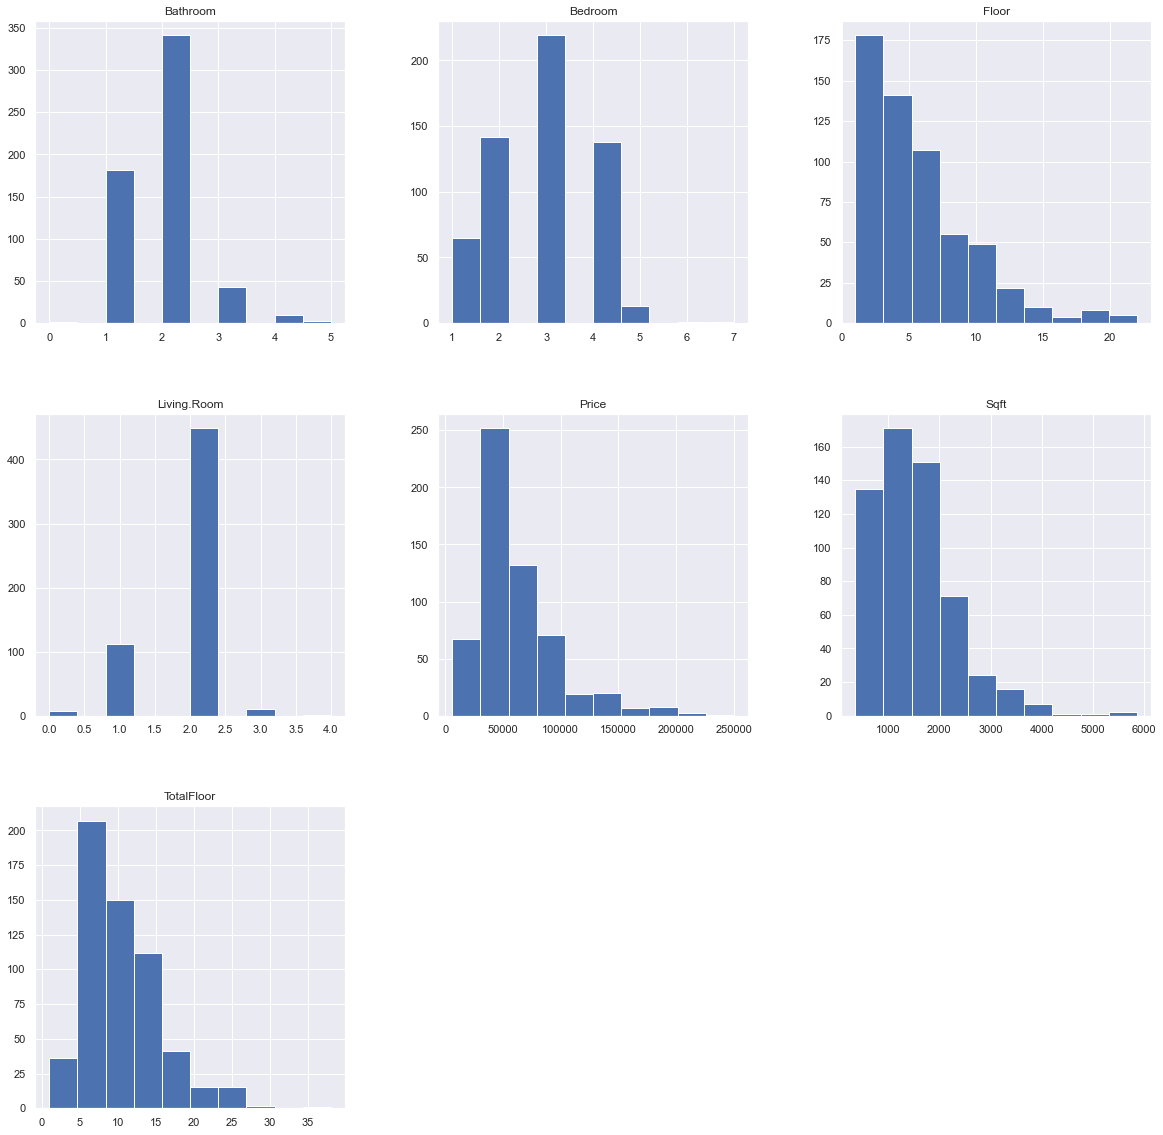

In [14]:
df.hist(figsize = (20,20))

In [23]:
df = df.drop(['Floor','TotalFloor','Bedroom','Living.Room','Bathroom'],axis=1)

In [24]:
scaler = StandardScaler()
df[["Sqft","Price"]] = scaler.fit_transform(df[["Sqft","Price"]])
df.head()

,Sqft,Price
0,-0.437149,0.017250
1,0.796255,0.465013
2,-0.487585,-0.094691
3,-0.074922,-0.458499
4,-0.707672,-0.458499


In [26]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

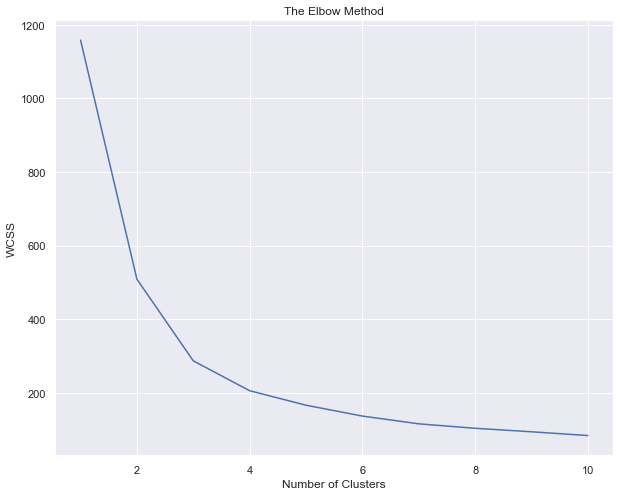

In [27]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(df)

In [30]:
y_kmeans

array([3, 2, 3, 3, 0, 2, 3, 0, 3, 3, 0, 0, 3, 0, 3, 1, 0, 0, 1, 0, 1, 0,
       2, 4, 2, 1, 0, 0, 3, 2, 3, 0, 0, 0, 0, 4, 0, 1, 0, 0, 3, 2, 3, 3,
       2, 0, 2, 3, 0, 0, 4, 2, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3,
       0, 3, 2, 0, 0, 2, 3, 3, 2, 0, 3, 0, 0, 0, 3, 3, 1, 3, 2, 2, 2, 2,
       3, 2, 2, 3, 2, 2, 3, 2, 3, 1, 1, 1, 2, 1, 0, 3, 2, 3, 0, 2, 2, 2,
       3, 1, 0, 0, 0, 0, 3, 2, 2, 1, 3, 2, 0, 0, 2, 3, 2, 0, 2, 3, 2, 2,
       1, 3, 3, 3, 3, 0, 2, 4, 3, 3, 2, 2, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0,
       4, 3, 2, 2, 2, 3, 0, 2, 2, 1, 2, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 3,
       2, 0, 0, 2, 3, 3, 2, 0, 0, 3, 0, 3, 3, 0, 3, 2, 0, 0, 3, 3, 3, 0,
       2, 3, 3, 3, 2, 0, 1, 3, 1, 0, 1, 0, 0, 2, 3, 2, 3, 3, 0, 3, 0, 2,
       0, 3, 1, 3, 1, 3, 1, 0, 1, 3, 2, 2, 2, 3, 0, 3, 1, 3, 0, 0, 3, 0,
       0, 0, 0, 3, 3, 3, 2, 0, 0, 3, 3, 2, 2, 0, 0, 3, 3, 3, 2, 3, 4, 2,
       0, 2, 3, 0, 2, 3, 3, 3, 1, 1, 1, 4, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 3, 0, 1, 2, 0, 3, 3,

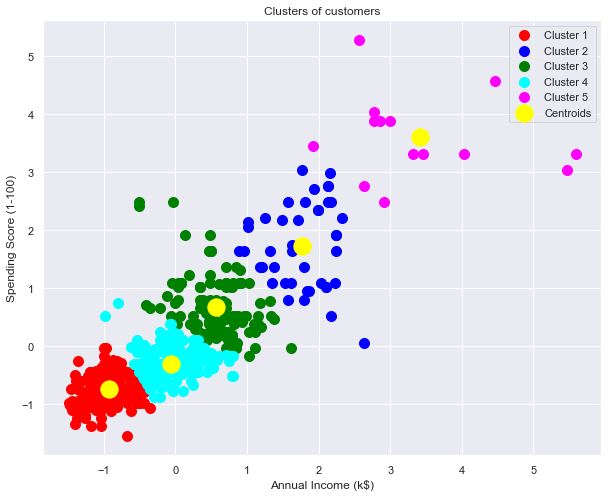

In [31]:
plt.scatter(df[y_kmeans == 0]['Sqft'], df[y_kmeans == 0]['Price'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df[y_kmeans == 1]['Sqft'], df[y_kmeans == 1]['Price'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df[y_kmeans == 2]['Sqft'], df[y_kmeans == 2]['Price'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(df[y_kmeans == 3]['Sqft'], df[y_kmeans == 3]['Price'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[y_kmeans == 4]['Sqft'], df[y_kmeans == 4]['Price'], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()